In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# 데이터셋 경로 설정 (./archive에 있는 데이터셋)
data_dir = './archive/'

# 데이터 전처리 설정
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# trainset 설정 (train 데이터 로드)
trainset = torchvision.datasets.ImageFolder(root=data_dir + 'train', transform=transform)

# trainloader 설정
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# testset 설정 (test 데이터 로드)
testset = torchvision.datasets.ImageFolder(root=data_dir + 'test', transform=transform)

# testloader 설정
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# 클래스 레이블 설정
classes = ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral')


FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

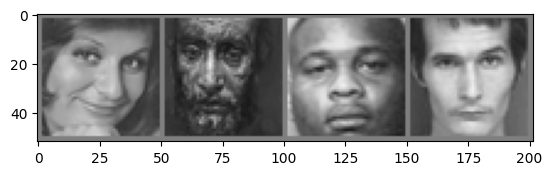

Happy   Sad Surprise  Fear


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 데이터셋 경로 설정 (./archive에 있는 데이터셋)
data_dir = './'

# 데이터 전처리 설정
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# trainset 설정 (train 데이터 로드)
trainset = torchvision.datasets.ImageFolder(root=data_dir + 'train', transform=transform)

# trainloader 설정
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# 클래스 레이블 설정
classes = ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))



In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()  # __init__의 __에 주의
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 7)  # 클래스 수를 7로 수정

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()



In [ ]:
import torch.optim as optim

# 손실 함수 설정 (CrossEntropyLoss)
criterion = nn.CrossEntropyLoss()

# 옵티마이저 설정 (SGD)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [ ]:
# GPU 사용 가능 여부 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 네트워크를 GPU로 이동
net.to(device)

# 클래스 수 (Emotion Detection 데이터셋의 경우 7개)
num_classes = 7

# 손실 함수 설정 (CrossEntropyLoss)
criterion = nn.CrossEntropyLoss()

# 옵티마이저 설정 (SGD)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # 데이터와 레이블을 GPU로 이동
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# 모델 저장 경로
PATH = './emotion_detection_net.pth'
# 모델의 state_dict 저장
torch.save(net.state_dict(), PATH)



RuntimeError: ignored

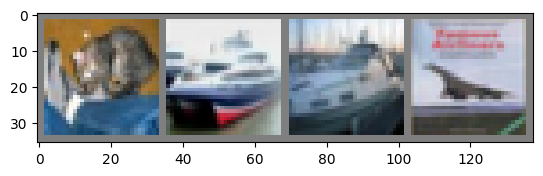

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship truck  ship


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil

# Google Drive에서 Colab으로 압축 파일 복사
source_path = './drive/MyDrive/archive.zip'
destination_path = './'

shutil.copy(source_path, destination_path)


'./archive.zip'

In [ ]:
import zipfile

# 압축 파일 경로
zip_file_path = './archive.zip'
# 압축을 해제할 디렉토리
extract_path = './'

# 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# 데이터셋 경로 설정
data_dir = './archive/train'

# 데이터 전처리 설정
transform = transforms.Compose([transforms.ToTensor()])

# Emotion Detection 데이터셋 로드
dataset = ImageFolder(root=data_dir, transform=transform)

# 데이터셋에서 이미지 크기 확인
sample_img, _ = dataset[0]  # 데이터셋의 첫 번째 이미지
image_size = sample_img.shape  # 이미지 크기 확인

print("이미지 크기:", image_size)


이미지 크기: torch.Size([3, 48, 48])


In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

# 새로운 이미지 크기 (Emotion Detection 데이터셋의 크기에 맞춰 조정)
# 데이터셋 이미지 크기
image_size = (3, 48, 48)

# 데이터 전처리 설정
transform = transforms.Compose([
    transforms.Resize(image_size[1:]),  # 이미지 크기 조정
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Emotion Detection 데이터셋 로드
trainset = torchvision.datasets.ImageFolder(root='./archive/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 수정된 입력 크기 (48x48 이미지에 대한 계산)
        self.fc1 = nn.Linear(16 * 10 * 10, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 7)  # 클래스 수를 7로 수정

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 10 * 10)  # 수정된 입력 크기
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# 클래스 수 (Emotion Detection 데이터셋의 경우 7개)
num_classes = 7

# 손실 함수 설정 (CrossEntropyLoss)
criterion = nn.CrossEntropyLoss()

# 모델 정의
net = Net()

# GPU 사용 가능 여부 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 네트워크를 GPU로 이동
net.to(device)


# 옵티마이저 설정 (SGD)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # 데이터와 레이블을 GPU로 이동
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# 모델 저장 경로
PATH = './emotion_detection_net.pth'
# 모델의 state_dict 저장
torch.save(net.state_dict(), PATH)


RuntimeError: ignored

In [ ]:
# 첫 번째 배치 로드
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 배치 크기 확인
batch_size = images.size(0)

print("배치 크기:", batch_size)


배치 크기: 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


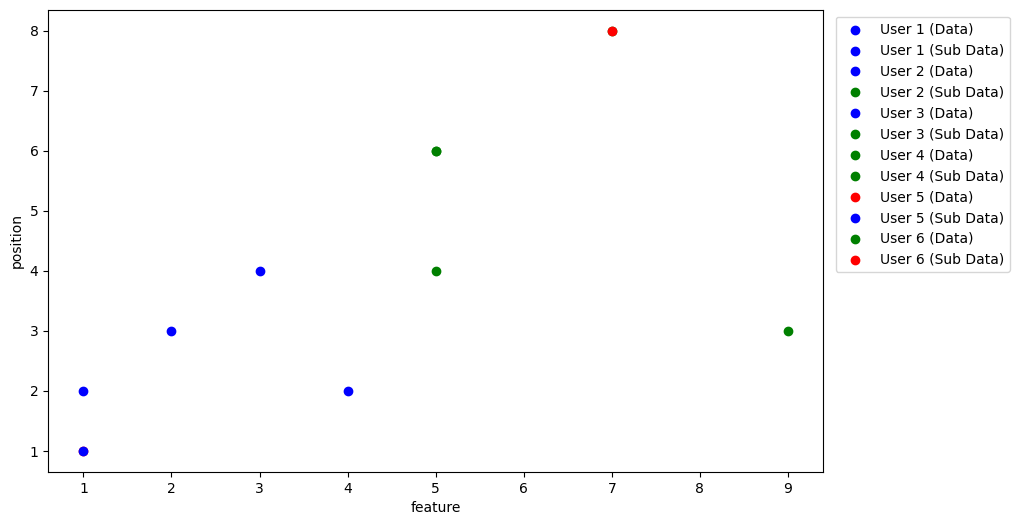

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt

# 가상의 사용자 데이터 생성
user_data = np.array([[1, 2, 3, 4],
                     [3, 4, 5, 6],
                     [2, 3, 4, 5],
                     [5, 6, 7, 8],
                     [1, 1, 2, 2],
                     [7, 8, 9, 10]])

user_sub_data = np.array([[4, 2, 3, 4],
                     [5, 4, 5, 6],
                     [9, 3, 4, 5],
                     [5, 6, 7, 8],
                     [1, 1, 3, 2],
                     [7, 8, 1, 10]])

user_class = [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]

# 클러스터링 수행 (K=3)
kmeans = KMeans(n_clusters=3)
kmeans.fit(user_data)
labels = kmeans.labels_

for i, user_label in enumerate(labels):
    user_class[i][0] = user_label + 1

# 클러스터링 수행 (K=3)
kmeans = KMeans(n_clusters=3)
kmeans.fit(user_sub_data)
labels = kmeans.labels_

for i, user_label in enumerate(labels):
    user_class[i][1] = user_label + 1

# 시각화
colors = ['r', 'g', 'b', 'c', 'm', 'y']

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.scatter(user_data[i][0], user_data[i][1], c=colors[user_class[i][0] - 1], label=f'User {i + 1} (Data)')
    plt.scatter(user_sub_data[i][0], user_sub_data[i][1], c=colors[user_class[i][1] - 1], label=f'User {i + 1} (Sub Data)')

plt.xlabel('feature')
plt.ylabel('position')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))
plt.show()


In [ ]:
import pandas as pd
# 각 카테고리에 대한 키워드 목록 생성
data_keywords = {
'Category': [ "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data", "Data",
"Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web", "Web",
"System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System", "System",
"Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design", "Design",
"Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan", "Plan",
"Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security", "Security"],
'Skills': ["data analysis", "data mining", "data modeling", "data visualization", "machine learning", "big data", "statistical analysis", "data preprocessing", "data cleansing", "business intelligence",
"data science", "data engineering", "data warehousing", "ETL", "data governance", "data integration", "predictive analytics", "time series analysis", "data exploration", "data storytelling",
"data interpretation", "feature engineering", "data-driven decision making", "data quality", "data pipeline", "data cleaning", "data transformation", "data wrangling", "data analytics",
"data insight", "data architecture", "data strategy", "data lifecycle", "data validation", "data architecture", "data mining techniques", "big data technologies", "data modeling tools", "data visualization tools",
"machine learning algorithms", "deep learning", "neural networks", "natural language processing", "computer vision", "data preprocessing tools", "data analysis tools", "data visualization tools", "data governance frameworks",
"data integration tools", "predictive analytics software", "front-end development", "back-end development", "web design", "user experience design", "web standards", "web accessibility", "frameworks", "version control", "web security", "UI/UX design",
"performance optimization", "web service deployment", "responsive design", "cross-browser compatibility", "HTML", "CSS", "JavaScript", "React", "Angular", "Vue.js",
"Node.js", "Python", "Django", "Flask", "REST API", "UI/UX design tools", "responsive web design", "web development tools", "web frameworks", "version control systems", "web security best practices",
"web performance optimization", "responsive web design principles", "front-end libraries", "back-end frameworks", "web deployment strategies", "web application architecture", "responsive web design tools", "web development best practices", "node", "front", "back", "css", "redis", "server", "route", "dns", "dhcp", "ip", "subnetmask", "system architecture", "network management", "operating systems", "server management", "performance optimization", "virtualization", "container technology", "database management", "cloud computing", "problem-solving",
"system design", "network administration", "Linux", "Windows Server", "system administration", "performance tuning", "virtualization technologies", "container orchestration", "database administration", "cloud platforms",
"problem-solving skills", "system analysis", "network configuration", "operating system maintenance", "server deployment", "system architecture design", "network monitoring", "cloud service deployment", "troubleshooting", "system documentation",
"network security", "server security", "database security", "cloud security", "troubleshooting methodologies", "system architecture tools", "network management tools", "operating system administration", "server management tools", "virtualization tools",
"containerization tools", "database management tools", "cloud computing platforms", "troubleshooting tools", "system documentation tools", "network security practices", "server security practices", "database security practices", "cloud security practices", "pwntool", "creativity", "graphic design", "user interface design", "user experience design", "design tools", "communication skills", "user-centered design", "design trends", "color theory", "layout design",
"design system", "web design", "mobile design", "visual design", "illustration", "typography", "prototyping", "wireframing", "design thinking", "motion graphics",
"icon design", "branding", "logo design", "poster design", "print design", "digital design", "sketching", "storyboarding", "design collaboration", "design software",
"creative problem solving", "conceptual thinking", "visual storytelling", "empathy in design", "user testing", "usability", "interaction design", "information architecture", "design research", "design critique",
"user feedback", "design principles", "design tools and software", "design thinking process", "visual design tools", "prototyping tools", "wireframing tools", "design collaboration tools", "design software tools", "figma", "strategic planning", "project management", "business understanding", "user-centered design", "decision-making skills", "project planning", "scheduling", "domain knowledge", "team collaboration", "communication skills",
"project coordination", "resource management", "project delivery", "scope definition", "stakeholder engagement", "risk management", "business analysis", "requirement gathering", "business strategy", "project leadership",
"problem-solving", "goal setting", "project metrics", "KPIs", "milestone tracking", "project management methodologies", "business process improvement", "business process modeling", "project management software", "agile methodology",
"Scrum", "Lean", "Kanban", "PRINCE2", "PMBOK", "Agile frameworks", "business process improvement tools", "business process modeling tools", "project management software tools", "agile methodology tools", "Scrum tools",
"Lean tools", "Kanban tools", "PRINCE2 tools", "PMBOK tools", "Agile frameworks tools", "idea", "insight", "stamina", "energy", "security expertise", "hacking prevention", "network security", "encryption technologies", "vulnerability scanning", "cyber threat awareness", "security policy development", "risk management", "regulatory compliance", "security certification",
"ethical hacking", "penetration testing", "intrusion detection", "firewall management", "access control", "security audits", "incident response", "security assessment", "compliance auditing", "security awareness",
"security best practices", "security risk assessment", "security analysis", "security tools", "security standards", "security protocols", "cybersecurity", "information security", "data security", "network security tools",
"vulnerability scanning tools", "firewall management tools", "security audits tools", "incident response tools", "security assessment tools", "compliance auditing tools", "security awareness tools", "security risk assessment tools", "security analysis tools",
"security tools and software", "security standards tools", "security protocols tools", "cybersecurity tools", "information security tools", "data security tools", "ctf", "kernel", "rev", "pwn", "web"]
}

category_data = data_keywords['Category']
skills_data = data_keywords['Skills']

# 데이터프레임 생성
df = pd.DataFrame({'Category': category_data, 'Skills': skills_data})

# 데이터프레임을 CSV 파일로 저장
df.to_csv('./it_job_skills_extended.csv', index=False)



data visualization


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import joblib

# 사용자가 지정한 모델 저장 경로 및 파일 이름
model_path = input("./")

# 모델 저장
joblib.dump(classifier, model_path)

print("모델이 저장되었습니다:", model_path)

# CSV 파일에서 데이터 불러오기
df = pd.read_csv('it_job_skills_extended.csv')

# Category 열을 타겟 변수로, Skills 열을 텍스트 데이터로 사용
X = df['Skills']
y = df['Category']

# 텍스트 데이터를 TF-IDF 벡터로 변환
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

# 학습 및 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 다중 분류를 위한 Naive Bayes 모델 초기화 및 학습
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# 모델 예측
y_pred = classifier.predict(X_test)

# 정확도 및 분류 보고서 출력
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(report)


./model2.pkl
모델이 저장되었습니다: model2.pkl
Accuracy: 60.00%
              precision    recall  f1-score   support

        Data       0.88      0.70      0.78        10
      Design       1.00      0.25      0.40         8
        Plan       0.90      0.69      0.78        13
    Security       1.00      0.43      0.60         7
      System       0.30      0.90      0.45        10
         Web       0.86      0.50      0.63        12

    accuracy                           0.60        60
   macro avg       0.82      0.58      0.61        60
weighted avg       0.81      0.60      0.62        60



Accuracy: 60.00%
{'Data': {'precision': 0.875, 'recall': 0.7, 'f1-score': 0.7777777777777777, 'support': 10}, 'Design': {'precision': 1.0, 'recall': 0.25, 'f1-score': 0.4, 'support': 8}, 'Plan': {'precision': 0.9, 'recall': 0.6923076923076923, 'f1-score': 0.7826086956521738, 'support': 13}, 'Security': {'precision': 1.0, 'recall': 0.42857142857142855, 'f1-score': 0.6, 'support': 7}, 'System': {'precision': 0.3, 'recall': 0.9, 'f1-score': 0.45000000000000007, 'support': 10}, 'Web': {'precision': 0.8571428571428571, 'recall': 0.5, 'f1-score': 0.631578947368421, 'support': 12}, 'accuracy': 0.6, 'macro avg': {'precision': 0.8220238095238095, 'recall': 0.5784798534798534, 'f1-score': 0.6069942367997289, 'support': 60}, 'weighted avg': {'precision': 0.8122619047619047, 'recall': 0.6, 'f1-score': 0.6238439698279515, 'support': 60}}


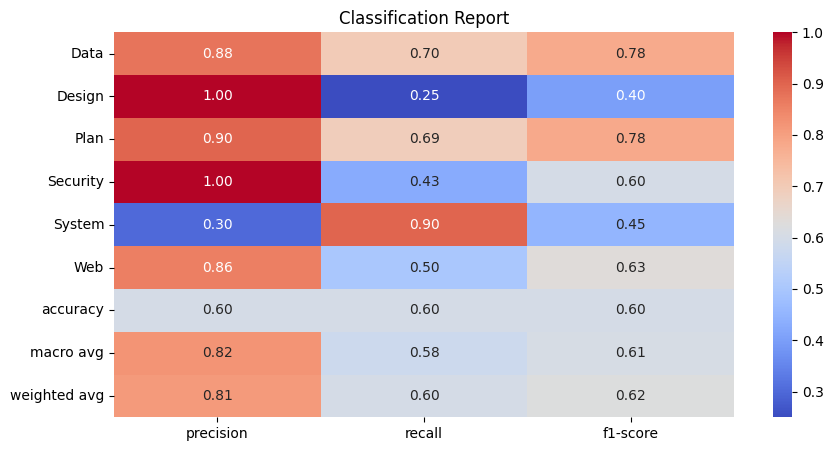

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# CSV 파일에서 데이터 불러오기
df = pd.read_csv('it_job_skills_extended.csv')

# Category 열을 타겟 변수로, Skills 열을 텍스트 데이터로 사용
X = df['Skills']
y = df['Category']

# 텍스트 데이터를 TF-IDF 벡터로 변환
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

# 학습 및 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 다중 분류를 위한 Naive Bayes 모델 초기화 및 학습
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# 모델 예측
y_pred = classifier.predict(X_test)

# 정확도 및 분류 보고서 출력
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(report)

# 분류 보고서 시각화
report_df = pd.DataFrame(report).transpose()

# 정밀도, 재현율, F1 점수 시각화
plt.figure(figsize=(10, 5))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report')
plt.show()




In [ ]:
# 모델 불러오기
loaded_classifier = joblib.load("model2.pkl")

# 불러온 모델을 사용하여 예측
new_text = ["javascript develop","java"]  # 실제 사용하고자 하는 텍스트 데이터
new_text_tfidf = tfidf_vectorizer.transform(new_text)  # TF-IDF 벡터로 변환
predicted_category = loaded_classifier.predict(new_text_tfidf)  # 분류 예측

print("예측된 카테고리:", predicted_category[0])


예측된 카테고리: Web


In [ ]:
t

Category length: 30
Write your skill in English: data analysis
Write your skill in English: datamining
Write your skill in English: machine learning
Write your skill in English: big data
Write your skill in English: ip
Write your skill in English: route
Write your skill in English: dns
Write your skill in English: css
Write your skill in English: back
Write your skill in English: front
Write your skill in English: idea
Write your skill in English: subnetmask
Write your skill in English: web security'
Write your skill in English: version control
Write your skill in English: frameworks
Write your skill in English: figma
Write your skill in English: user feedback
Write your skill in English: Lean
Write your skill in English: Scrum
Write your skill in English: Kanban
Write your skill in English: PMBOK
Write your skill in English: business process improvement tools
Write your skill in English: cyber threat awareness
Write your skill in English: data cleaning
Write your skill in English: sta

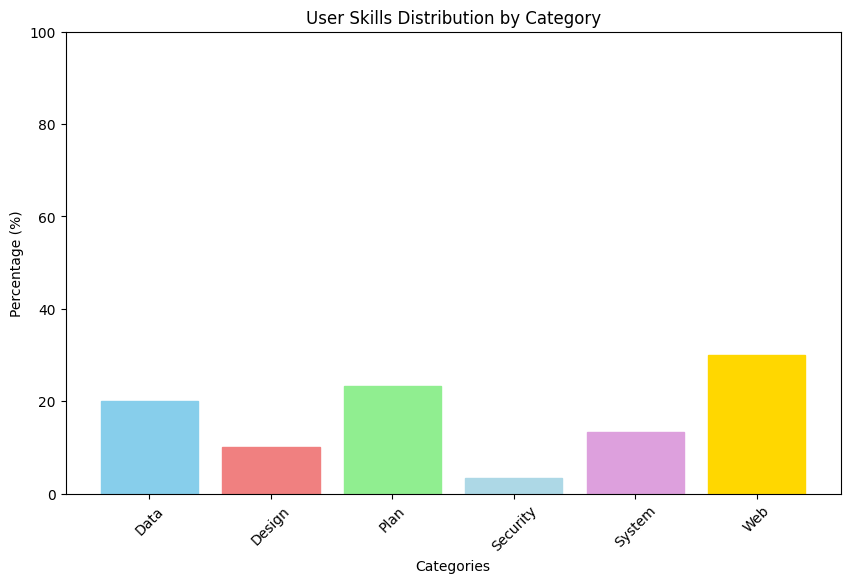

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
import joblib
import matplotlib.pyplot as plt

# 모델 로드
loaded_classifier = joblib.load("model2.pkl")

category_length = int(input("Category length: "))
user_skills = []
user_skill_donate = [0, 0, 0, 0, 0, 0]
category_names = ["Data", "Design", "Plan", "Security", "System", "Web"]

# 카테고리 이름을 인덱스로 매핑
category_index = {category: i for i, category in enumerate(category_names)}

# 색상 지정
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'plum', 'gold']

for i in range(category_length):
    skill = input("Write your skill in English: ")
    user_skills.append(skill)

new_text_tfidf = tfidf_vectorizer.transform(user_skills)  # TF-IDF 벡터로 변환

predicted_categories = loaded_classifier.predict(new_text_tfidf)  # 분류 예측

for category in predicted_categories:
    user_skill_donate[category_index[category]] += 1

percentages = [user_skill_donate[i] / category_length * 100 for i in range(6)]  # percentages 리스트 정의

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(category_names, percentages, color=colors)  # percentages 리스트를 사용

plt.xlabel('Categories')
plt.ylabel('Percentage (%)')
plt.title('User Skills Distribution by Category')

# 색상을 카테고리에 따라 지정
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.ylim(0, 100)  # y-축 범위 설정
plt.xticks(rotation=45)  # x-축 레이블 회전
plt.show()

plt.figure()
